EDA of csv file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [28]:
data = pd.read_csv('labels.csv')

In [29]:
data.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# _, axs = plt.subplots(5, 5, figsize=(12, 12))

# f, axarr = plt.subplots(2,2)
# axarr[0,0].imshow(imgs[0])
# axarr[0,1].imshow(imgs[1])
# axarr[1,0].imshow(imgs[2])
# axarr[1,1].imshow(imgs[3])
data["id"] = "train/" + data["id"] + ".jpg"
imgs = data["id"].values[:25]
img_count = 0

fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))
axs = axs.flatten()
for i, file in enumerate(imgs):
    pic = plt.imread(file)
    axs[i].imshow(pic)

In [4]:
data.shape

(10222, 2)

In [5]:
data.isna().any()

id       False
breed    False
dtype: bool

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [7]:
data.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [8]:
data['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

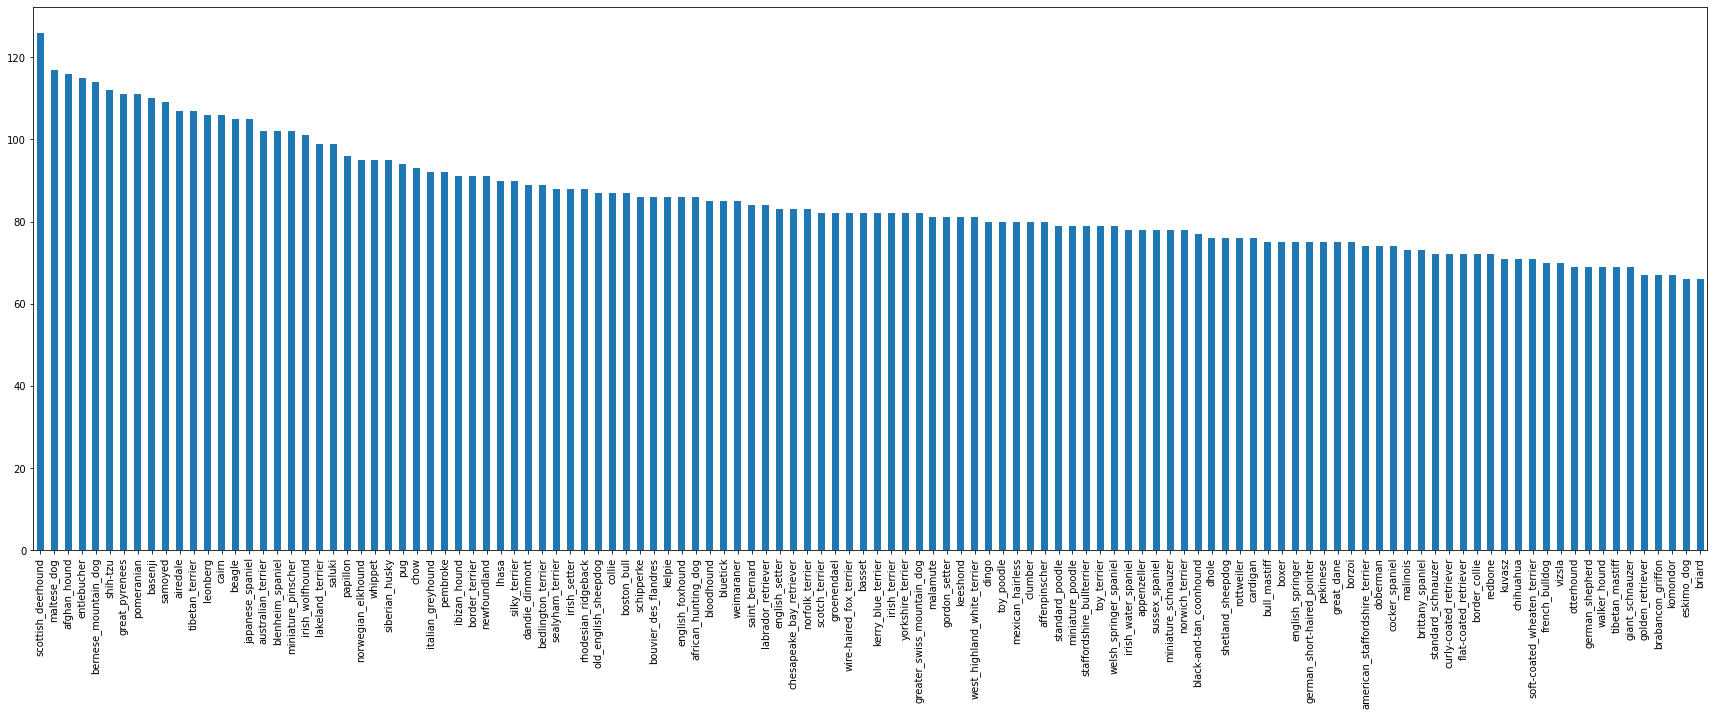

In [10]:
ax = data['breed'].value_counts().plot(kind='bar',figsize=(30, 10))

In [11]:
breed_array = data['breed'].value_counts().values

In [12]:
breed_array.mean()

85.18333333333334

In [13]:
breed_array.min()

66

In [14]:
breed_array.max()

126

Text(0.5, 1.0, 'Number of Dog Breed images per class')

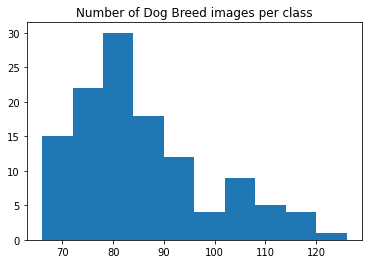

In [15]:
_ = plt.hist(breed_array)
plt.title("Number of Dog Breed images per class")

In [16]:
print("10 percentile :",np.percentile(breed_array, 10))
print("50 percentile :",np.percentile(breed_array, 50))
print("80 percentile :",np.percentile(breed_array, 80))
print("90 percentile :",np.percentile(breed_array, 90))
print("95 percentile :",np.percentile(breed_array, 95))
print("99 percentile :",np.percentile(breed_array, 99))

10 percentile : 70.9
50 percentile : 82.0
80 percentile : 95.0
90 percentile : 106.10000000000001
95 percentile : 111.05
99 percentile : 116.81


### Observation
1) Dataset is imbalance.
2) Average number of images per class are 85.
3) Briard breed as least number of images 66 and scottish deerhound has most number of images 126.
4) For all the breed we have atleast 66 images.
5) Most of the breed have 70-90 images.

##### Checking Height and Width of image

In [ ]:
path = "train/"
width_list = []
height_list = []
for index, row in data.iterrows():
    filepath = path + row['id'] +".jpg"
    # print(filepath)
    im = cv2.imread(filepath)
    h, w, c = im.shape
    width_list.append(w)
    height_list.append(h)

In [50]:
data['width'] = width_list
data['height'] = height_list

In [51]:
data.head()

,id,breed,width,height
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,500,375
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,500,375
2,001cdf01b096e06d78e9e5112d419397,pekinese,500,375
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,400,344
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,500,500


In [52]:
data.to_csv('final_df.csv')

In [17]:
data = pd.read_csv("final_df.csv",index_col=0)

In [18]:
data.head()

,id,breed,width,height
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,500,375
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,500,375
2,001cdf01b096e06d78e9e5112d419397,pekinese,500,375
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,400,344
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,500,500


In [19]:
data.groupby(["width", "height"]).size()

width  height
97     134       1
103    120       1
110    150       1
111    150       1
112    120       1
                ..
2304   1728      1
2388   2562      1
2560   1920      1
2740   1732      1
3264   2448      2
Length: 2656, dtype: int64

##### Out of 10222 image there are 2656 different sizes of images.

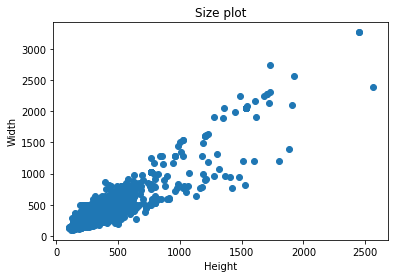

In [20]:
plt.scatter(data['height'], data['width'])
plt.xlabel('Height')
plt.ylabel('Width')
plt.title('Size plot')
plt.show()

In [22]:
data['width'].mean()

443.33153981608297

In [23]:
data['height'].mean()

386.74721189591077

In [25]:
print("5 percentile :",np.percentile(data['width'], 5))
print("10 percentile :",np.percentile(data['width'], 10))
print("30 percentile :",np.percentile(data['width'], 30))
print("50 percentile :",np.percentile(data['width'], 50))
print("80 percentile :",np.percentile(data['width'], 80))
print("90 percentile :",np.percentile(data['width'], 90))
print("95 percentile :",np.percentile(data['width'], 95))
print("99 percentile :",np.percentile(data['width'], 99))

5 percentile : 222.0
10 percentile : 288.0
30 percentile : 375.0
50 percentile : 500.0
80 percentile : 500.0
90 percentile : 500.0
95 percentile : 500.0
99 percentile : 800.0


In [26]:
print("5 percentile :",np.percentile(data['height'], 5))
print("10 percentile :",np.percentile(data['height'], 10))
print("30 percentile :",np.percentile(data['height'], 30))
print("50 percentile :",np.percentile(data['height'], 50))
print("80 percentile :",np.percentile(data['height'], 80))
print("90 percentile :",np.percentile(data['height'], 90))
print("95 percentile :",np.percentile(data['height'], 95))
print("99 percentile :",np.percentile(data['height'], 99))

5 percentile : 211.0
10 percentile : 260.0
30 percentile : 333.0
50 percentile : 375.0
80 percentile : 500.0
90 percentile : 500.0
95 percentile : 500.0
99 percentile : 773.3699999999972


In [28]:
data[data['width']< 300]['breed'].value_counts()

english_foxhound           41
bouvier_des_flandres       40
sealyham_terrier           40
japanese_spaniel           39
wire-haired_fox_terrier    37
                           ..
tibetan_terrier             1
pembroke                    1
cairn                       1
airedale                    1
pug                         1
Name: breed, Length: 119, dtype: int64

In [29]:
data[data['height']< 300]['breed'].value_counts()

english_foxhound           54
sealyham_terrier           52
japanese_spaniel           47
wire-haired_fox_terrier    45
bouvier_des_flandres       38
                           ..
chow                        2
scotch_terrier              2
great_dane                  1
english_springer            1
miniature_schnauzer         1
Name: breed, Length: 120, dtype: int64

In [34]:
type(data['breed'].value_counts())

pandas.core.series.Series

In [44]:
data[data['width']< 300]['breed'].value_counts().divide(data['breed'].value_counts(),fill_value=0).sort_values(ascending=False)[0:15]

english_foxhound           0.476744
bouvier_des_flandres       0.465116
sealyham_terrier           0.454545
wire-haired_fox_terrier    0.451220
otterhound                 0.434783
affenpinscher              0.387500
japanese_spaniel           0.371429
mexican_hairless           0.300000
black-and-tan_coonhound    0.298701
walker_hound               0.289855
irish_water_spaniel        0.282051
curly-coated_retriever     0.263889
kerry_blue_terrier         0.219512
tibetan_mastiff            0.217391
brabancon_griffon          0.208955
Name: breed, dtype: float64

In [43]:
data[data['height']< 300]['breed'].value_counts().divide(data['breed'].value_counts(),fill_value=0).sort_values(ascending=False)[0:15]

english_foxhound           0.627907
sealyham_terrier           0.590909
wire-haired_fox_terrier    0.548780
otterhound                 0.536232
black-and-tan_coonhound    0.480519
affenpinscher              0.450000
japanese_spaniel           0.447619
bouvier_des_flandres       0.441860
kerry_blue_terrier         0.365854
walker_hound               0.347826
mexican_hairless           0.337500
irish_water_spaniel        0.307692
komondor                   0.298507
curly-coated_retriever     0.291667
blenheim_spaniel           0.284314
Name: breed, dtype: float64

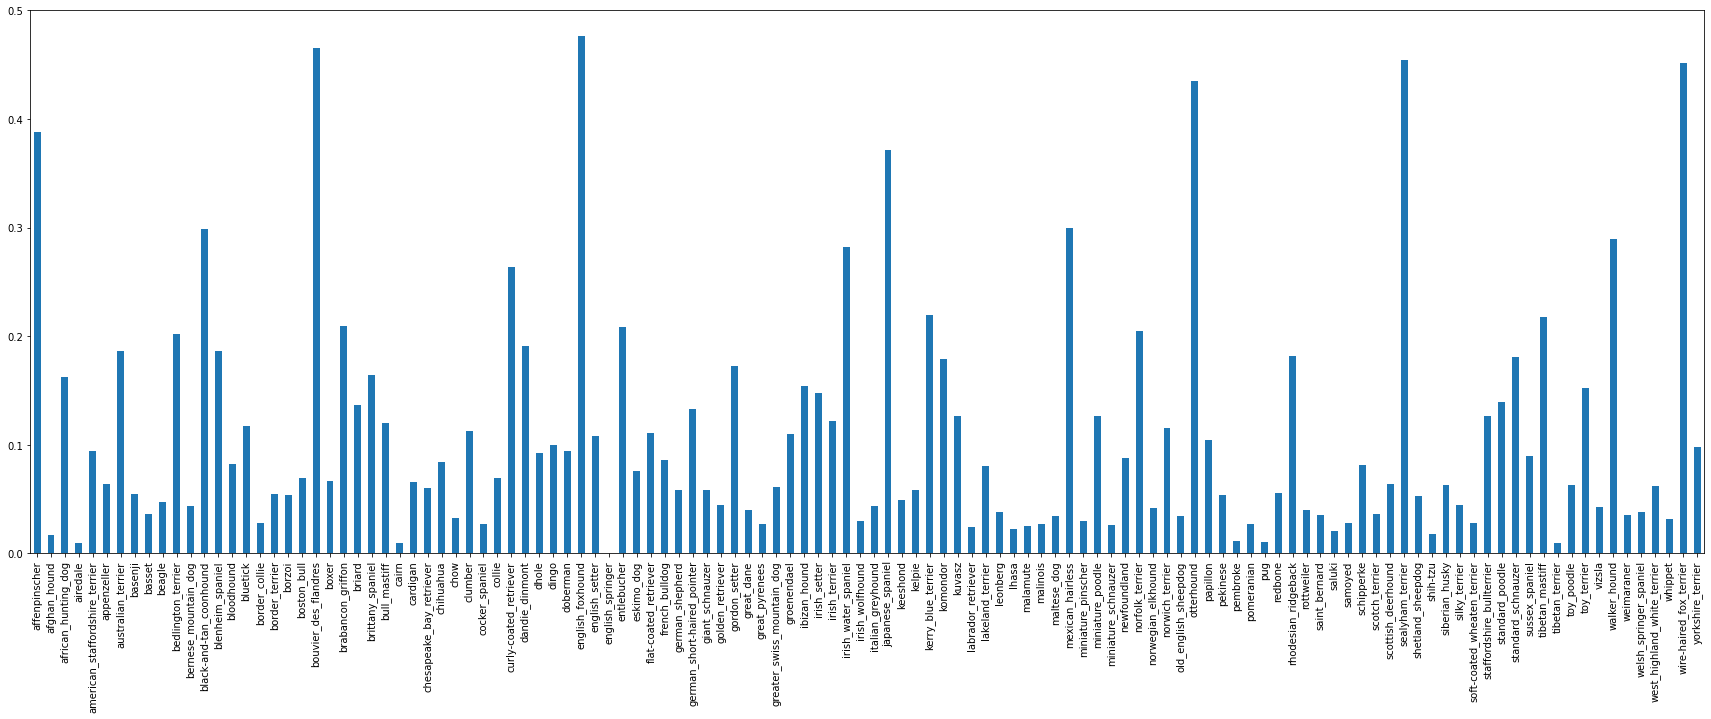

In [36]:
ax = data[data['width']< 300]['breed'].value_counts().divide(data['breed'].value_counts(),fill_value=0).plot(kind='bar',figsize=(30, 10))

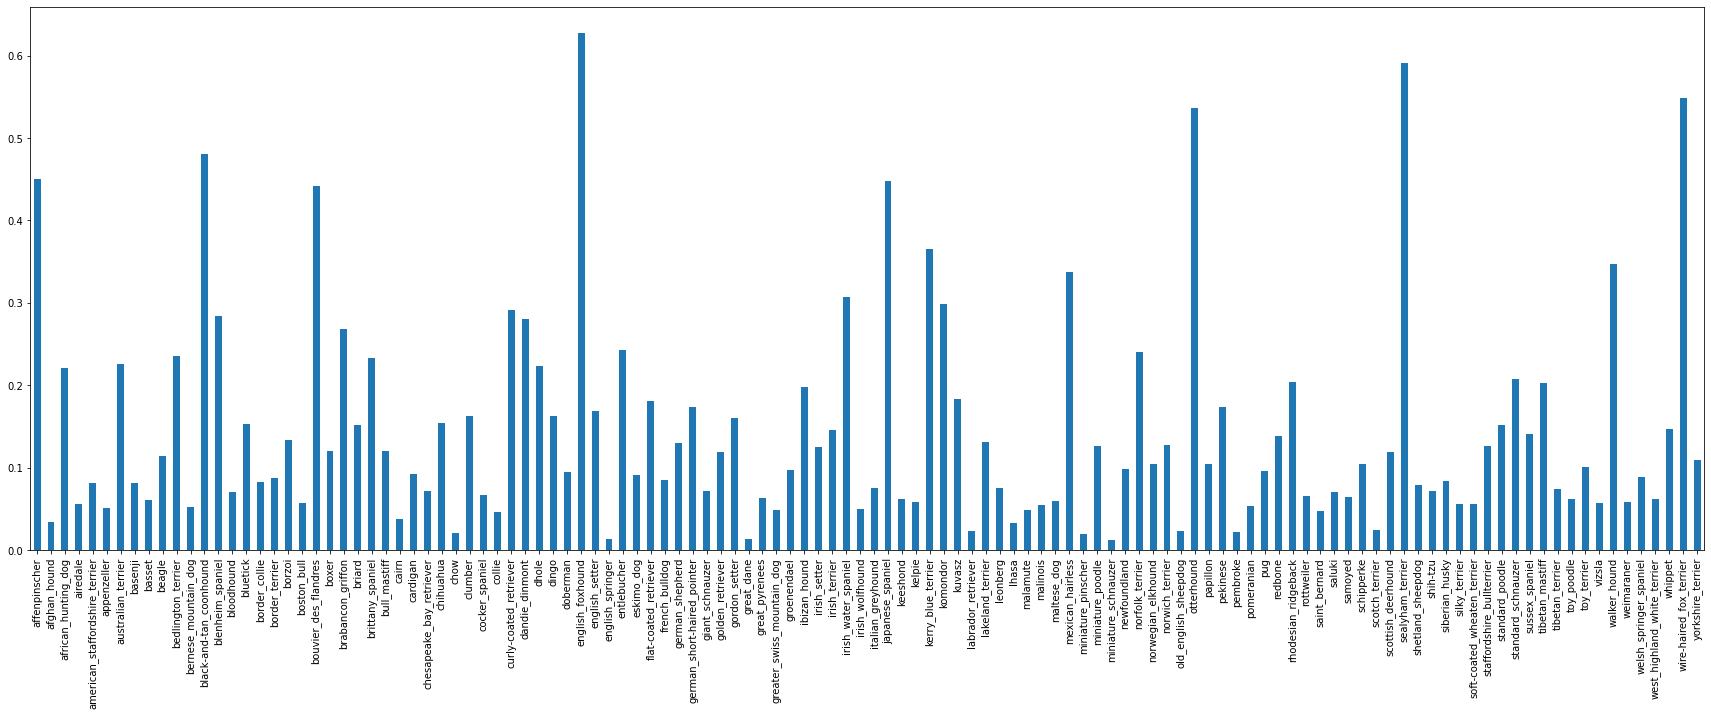

In [41]:
ax = data[data['height']< 300]['breed'].value_counts().divide(data['breed'].value_counts(),fill_value=0).plot(kind='bar',figsize=(30, 10))

#### Observations
In the dataset there are some breed which has more then 50% small image size(less than 300X300).  